In [1]:
import numpy as np
import psi4
from matplotlib import pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
### template for the z-matrix
mol_tmpl = """F
F 1 **R**"""

In [3]:
''' create arrays in this cell! '''
### We will probably forget about the molecules array, so let's have it pre-declared!
molecules = []

r_array = [.5, .55, .60, .65, .67, .69, .77, .79, .83, .88, .94, 1.02, 1.05, 1.08, 1.12, 1.16, 1.19, 1.22, 1.25, 1.30, 1.35, 1.37, 1.40, 1.43, 1.54, 1.56, 1.67, 1.70, 2.5]

RHF_E_array = []
MP2_E_array = []
CCSD_E_array = []

In [4]:
### loop over the different bond-lengths, create different instances
### of HF molecule
for r in r_array:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
    
### loop over instances of molecules, compute the RHF, MP2, and CCSD
### energies and store them in their respective arrays
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVTZ", molecule=mol)
    RHF_E_array.append(energy)
    energy = psi4.energy("MP2/cc-pVTZ", molecule=mol)
    MP2_E_array.append(energy)
    energy = psi4.energy("CCSD/cc-pVTZ",molecule=mol)
    CCSD_E_array.append(energy)


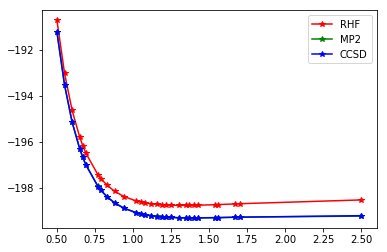

In [5]:
''' Write code to plot PESs in this cell! '''

plt.plot(r_array, RHF_E_array, 'r-*', label = 'RHF')
plt.plot(r_array, MP2_E_array, 'g-*', label = 'MP2')
plt.plot(r_array, CCSD_E_array, 'b-*', label = 'CCSD')
plt.legend()
plt.show()

In [6]:
''' Create array of bond lengths in atomic units called r_array_au and fit PESs to splines in this cell! '''
r_array_au = []

for r in r_array:
    r_array_au.append(r * 1.89)
print(r_array_au)

## RHF Spline
RHF_E_Spline = InterpolatedUnivariateSpline(r_array_au,RHF_E_array, k=3)

## MP2 Spline
MP2_E_Spline = InterpolatedUnivariateSpline(r_array_au,MP2_E_array, k=3)

## CCSD Spline
CCSD_E_Spline = InterpolatedUnivariateSpline(r_array_au,CCSD_E_array, k=3)

[0.945, 1.0395, 1.134, 1.2285, 1.2663, 1.3040999999999998, 1.4553, 1.4931, 1.5686999999999998, 1.6632, 1.7765999999999997, 1.9278, 1.9845, 2.0412, 2.1168, 2.1923999999999997, 2.2491, 2.3057999999999996, 2.3625, 2.457, 2.5515, 2.5893, 2.646, 2.7026999999999997, 2.9106, 2.9484, 3.1563, 3.2129999999999996, 4.725]


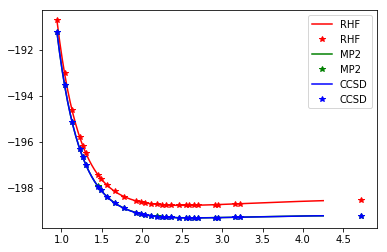

-199.27491503252264


In [7]:
### form a much finer grid to evaluate spline object at
r_fine = np.linspace(0.5*1.89,2.25*1.89,200)

### compute the interpolated/extrapolated values for RHF Energy on this grid
RHF_E_fine = RHF_E_Spline(r_fine)

### compute the interpolated/extrapolated values for RHF Energy on this grid
MP2_E_fine = MP2_E_Spline(r_fine)

### compute the interpolated/extrapolated values for RHF Energy on this grid
CCSD_E_fine = CCSD_E_Spline(r_fine)


### plot the interpolated data with lines against computed data in *'s
plt.plot(r_fine, RHF_E_fine, 'red', r_array_au, RHF_E_array, 'r*', label='RHF')
plt.plot(r_fine, MP2_E_fine, 'green', r_array_au, MP2_E_array, 'g*', label='MP2')
plt.plot(r_fine, CCSD_E_fine, 'blue', r_array_au, CCSD_E_array, 'b*', label='CCSD')
plt.legend()
plt.show()

print(MP2_E_Spline(3.11))

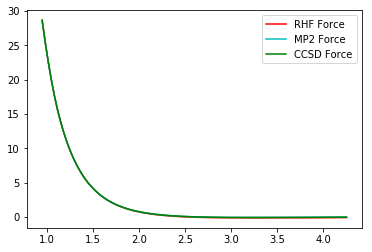

In [8]:
''' Differentiate splines and plot resulting forces in this cell! '''
RHF_Force_Spline = RHF_E_Spline.derivative()
MP2_Force_Spline = MP2_E_Spline.derivative()
CCSD_Force_Spline = CCSD_E_Spline.derivative()

RHF_Force_fine = -1* RHF_Force_Spline(r_fine)
MP2_Force_fine = -1* MP2_Force_Spline(r_fine)
CCSD_Force_fine = -1* CCSD_Force_Spline(r_fine)

plt.plot(r_fine, RHF_Force_fine, 'red', label = 'RHF Force')
plt.plot(r_fine, MP2_Force_fine, 'c', label = 'MP2 Force')
plt.plot(r_fine, CCSD_Force_fine, 'g', label = 'CCSD Force')

plt.legend()
plt.show()

In [9]:
### Find Equilibrium Bond-Lengths for each level of theory
RHF_Req_idx = np.argmin(RHF_E_fine)
MP2_Req_idx = np.argmin(MP2_E_fine)
CCSD_Req_idx = np.argmin(CCSD_E_fine)

### find the value of the separation corresponding to that index
RHF_Req = r_fine[RHF_Req_idx]
MP2_Req = r_fine[MP2_Req_idx]
CCSD_Req = r_fine[CCSD_Req_idx]

### print equilibrium bond-lengths at each level of theory!
print(" Equilibrium bond length at RHF/cc-pVDZ level is ",RHF_Req, "atomic units")
print(" Equilibrium bond length at MP2/cc-pVDZ level is ",MP2_Req, "atomic units")
print(" Equilibrium bond lengthat CCSD/cc-pVDZ level is ",CCSD_Req, "atomic units")

print(" RHF Req is " , RHF_Req/1.89, "Angstroms")
print(" MP2 Req is " , MP2_Req/1.89, "Angstroms")
print(" CCSD Req is " , CCSD_Req/1.89, "Angstroms")

## Mass of Flourine in Atomic Units
mF = 34883.
## Mass of Flourine in Atomic Units
mF = 34883.
## Reduced mass of HF
mu = mF * mF/(mF + mF)
print("Reduced mass of F2 is: ", mu , "in Atomic Units")

 Equilibrium bond length at RHF/cc-pVDZ level is  2.507336683417085 atomic units
 Equilibrium bond length at MP2/cc-pVDZ level is  2.6403015075376883 atomic units
 Equilibrium bond lengthat CCSD/cc-pVDZ level is  2.623680904522613 atomic units
 RHF Req is  1.3266331658291457 Angstroms
 MP2 Req is  1.3969849246231156 Angstroms
 CCSD Req is  1.3881909547738693 Angstroms
Reduced mass of F2 is:  17441.5 in Atomic Units


In [10]:
''' Differentiate force splines to get curvatures and determine force constants in this cell!'''
RHF_Curvature_Spline = RHF_Force_Spline.derivative()
MP2_Curvature_Spline = MP2_Force_Spline.derivative()
CCSD_Curvature_Spline = CCSD_Force_Spline.derivative()

##Force Constant for RHF
RHF_Force_Constant = RHF_Curvature_Spline(RHF_Req)
##Force Constant for MP2
MP2_Force_Constant = MP2_Curvature_Spline(MP2_Req)
##Force Constant for CCSD
CCSD_Force_Constant = CCSD_Curvature_Spline(CCSD_Req)

print("RHF Force Constant is : ", RHF_Force_Constant)
print("MP2 Force Constant is : ", MP2_Force_Constant)
print("CCSD Force Constant is : ", CCSD_Force_Constant)

## Calculate the vibrational frequencies in atomic units
RHF_nu = 1/(2 * np.pi) * np.sqrt(RHF_Force_Constant/mu)
MP2_nu = 1/(2 * np.pi) * np.sqrt(MP2_Force_Constant/mu)
CCSD_nu = 1/(2 * np.pi) * np.sqrt(CCSD_Force_Constant/mu)

print("RHF Frequency is : ", RHF_nu)
print("MP2 Frequency is : ", MP2_nu)
print("CCSD Frequency is : ", CCSD_nu)


RHF_E_vib_ev = 2* np.pi * RHF_nu * 27.211
MP2_E_vib_ev = 2* np.pi * MP2_nu * 27.211
CCSD_E_vib_ev = 2* np.pi * CCSD_nu * 27.211

print("Vibrational Energy at RHF level is : ", RHF_E_vib_ev, "Ev")
print("Vibrational Energy at MP2 level is : ", MP2_E_vib_ev, "Ev")
print("Vibrational Energy at CCSD level is : ", CCSD_E_vib_ev, "Ev")

RHF Force Constant is :  0.5876623659075241
MP2 Force Constant is :  0.37099949242188557
CCSD Force Constant is :  0.38219280704140607
RHF Frequency is :  0.0009238301997622822
MP2 Frequency is :  0.0007340317969930305
CCSD Frequency is :  0.0007450226394702042
Vibrational Energy at RHF level is :  0.1579488709390364 Ev
Vibrational Energy at MP2 level is :  0.1254987048466638 Ev
Vibrational Energy at CCSD level is :  0.12737782847824144 Ev


In [11]:
''' Create arrays of Harmonic potentials in this cell! '''
RHF_Harm_Pot = 0.5 * RHF_Force_Constant * (r_fine - RHF_Req)**2 + RHF_E_Spline(RHF_Req)
MP2_Harm_Pot = 0.5 * MP2_Force_Constant * (r_fine - MP2_Req)**2 + MP2_E_Spline(RHF_Req)
CCSD_Harm_Pot = 0.5 * CCSD_Force_Constant * (r_fine - CCSD_Req)**2 + CCSD_E_Spline(RHF_Req)

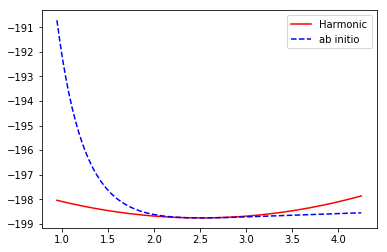

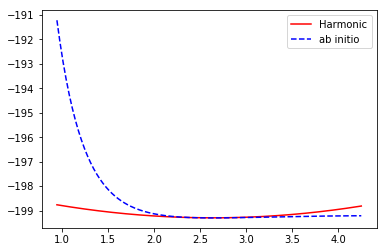

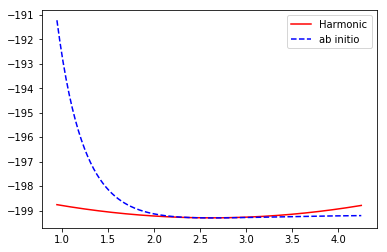

In [12]:
### plot RHF harmonic potential vs RHF ab initio potential!
plt.plot(r_fine, RHF_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, RHF_E_fine, 'b--', label='ab initio' )
### these limits were chosen to zoom in on region of the RHF PES that is approximately
### harmonic
plt.legend()
plt.show()

### plot RHF harmonic potential vs MP2 ab initio potential!
plt.plot(r_fine, MP2_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, MP2_E_fine, 'b--', label='ab initio' )
### these limits were chosen to zoom in on region of the MP2 PES that is approximately
### harmonic
plt.legend()
plt.show()

### plot RHF harmonic potential vs CCSD ab initio potential!
plt.plot(r_fine, CCSD_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, CCSD_E_fine, 'b--', label='ab initio' )
### these limits were chosen to zoom in on region of the CCSD PES that is approximately
### harmonic
plt.legend()
plt.show()

In [13]:
''' Velocity Verlet function goes in this cell! '''
def Velocity_Verlet(r_curr, v_curr, mu, force_spline, dt):
    ### define a variable called a_curr which is the acceleration at r_curr
    a_curr = -1 * force_spline(r_curr)/mu
    ### use v_curr and a_curr to update r_curr to r_new
    r_new = r_curr + v_curr * dt + 0.5 * a_curr * dt**2
    ### use the new r_new to update acceleration, store as a_new
    a_new = -1 * force_spline(r_new)/mu
    ### update velocity
    v_new = v_curr + 0.5 *(a_curr + a_new)*dt
    
    return [r_new, v_new]

In [14]:
''' Analytic solution to Harmonic Oscillator r(t) goes here! '''
def harmonic_position(om, amp, phase, req, t):
    return amp * np.sin( om * t + phase ) + req

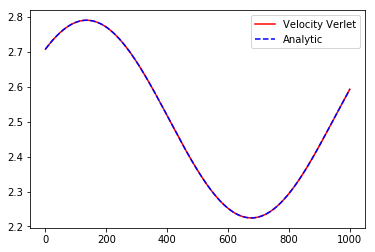

In [15]:
### how many updates do you want to perform?
N_updates = 10000

### establish time-step for integration to be 0.02 atomic units... this is about 0.0005 femtoseconds
### so total time is 200000*0.02 atomic units of time which is ~9.6e-13 s, or 960 fs
dt = 0.1

### results from VV algorithm
hr_vs_t = np.zeros(N_updates)
hv_vs_t = np.zeros(N_updates)
### analytic result for r(t)
ar_vs_t = np.zeros(N_updates)
### array to store time in atomic units
t_array = np.zeros(N_updates)

### establish some constants relevant for analytic solution
### harmonic freq
om = np.sqrt(RHF_Force_Constant/mu)
### initial displacement 
x0 = 0.2
### amplitude for analytic solution
Amp = x0/(np.sin(np.pi/4))
### initial velocity
v0 = Amp * om * np.cos(np.pi/4)

hr_vs_t[0] = RHF_Req+x0
hv_vs_t[0] = v0

### We need a spline object for the harmonic force to pass to the Velocity Verlet algorithm,
### let's get that now!

### spline for Harmonic potential using RHF_k
RHF_Harm_Pot_Spline = InterpolatedUnivariateSpline(r_fine, RHF_Harm_Pot, k=3)
### RHF harmonic force
RHF_Harm_Force = RHF_Harm_Pot_Spline.derivative()


### first Velocity Verlet update
result_array = Velocity_Verlet(hr_vs_t[0], hv_vs_t[0], mu, RHF_Harm_Force, dt)
### first analytic result
ar_vs_t[0] = harmonic_position(om, Amp, np.pi/4, RHF_Req, 0)
### do the update N_update-1 more times
for i in range(1,N_updates):
    ### store current time
    t_array[i] = dt*i
    ### Compute VV update
    result_array = Velocity_Verlet(result_array[0], result_array[1], mu, RHF_Harm_Force, dt)
    ### store results from VV update
    hr_vs_t[i] = result_array[0]
    hv_vs_t[i] = result_array[1]
    ### compute and store results from analytic solution
    ar_vs_t[i] = harmonic_position(om, Amp, np.pi/4, RHF_Req, dt*i)

### Plot result and compare!
plt.plot(t_array, hr_vs_t, 'red', label="Velocity Verlet")
plt.plot(t_array, ar_vs_t, 'b--', label="Analytic")
plt.legend()
plt.show()


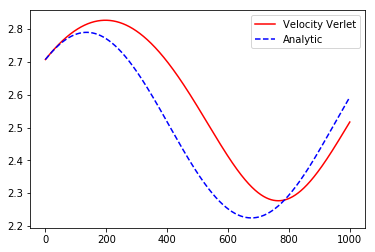

In [16]:
### how many updates do you want to perform?
N_updates = 10000

### establish time-step for integration to be 0.02 atomic units... this is about 0.0005 femtoseconds
### so total time is 200000*0.02 atomic units of time which is ~9.6e-13 s, or 960 fs
dt = 0.1

### results from VV algorithm
hr_vs_t = np.zeros(N_updates)
hv_vs_t = np.zeros(N_updates)
### analytic result for r(t)
ar_vs_t = np.zeros(N_updates)
### array to store time in atomic units
t_array = np.zeros(N_updates)

### establish some constants relevant for analytic solution
### harmonic freq
om = np.sqrt(RHF_Force_Constant/mu)
### initial displacement 
x0 = 0.2
### amplitude for analytic solution
Amp = x0/(np.sin(np.pi/4))
### initial velocity
v0 = Amp * om * np.cos(np.pi/4)

hr_vs_t[0] = RHF_Req+x0
hv_vs_t[0] = v0

### We need a spline object for the harmonic force to pass to the Velocity Verlet algorithm,
### let's get that now!

### spline for Harmonic potential using RHF_k
RHF_Harm_Pot_Spline = InterpolatedUnivariateSpline(r_fine, RHF_Harm_Pot, k=3)
### RHF harmonic force
RHF_Harm_Force = RHF_Harm_Pot_Spline.derivative()


### first Velocity Verlet update
result_array = Velocity_Verlet(hr_vs_t[0], hv_vs_t[0], mu, RHF_Force_Spline, dt)
### first analytic result
ar_vs_t[0] = harmonic_position(om, Amp, np.pi/4, RHF_Req, 0)
### do the update N_update-1 more times
for i in range(1,N_updates):
    ### store current time
    t_array[i] = dt*i
    ### Compute VV update
    result_array = Velocity_Verlet(result_array[0], result_array[1], mu, RHF_Force_Spline, dt)
    ### store results from VV update
    hr_vs_t[i] = result_array[0]
    hv_vs_t[i] = result_array[1]
    ### compute and store results from analytic solution
    ar_vs_t[i] = harmonic_position(om, Amp, np.pi/4, RHF_Req, dt*i)

### Plot result and compare!
plt.plot(t_array, hr_vs_t, 'red', label="Velocity Verlet")
plt.plot(t_array, ar_vs_t, 'b--', label="Analytic")
plt.legend()
plt.show()